In [3]:
from make_tfrecords import *

# 실행
tfroecord_sample = TFrecord_Create_For_Unet(train_test = 'train',
                        img_folder = '/notebooks/Unet_membrane/unet/data/membrane/train/new_data/',
                        img_type = 'png',
                        label_name = 'labels',
                        tf_record_pre_fix = 'membrane_train',
                        nx = 512,
                        ny = 512
                       )


tfrecord = TFrecord_Create_For_Unet(train_test = 'test',
                        img_folder = '/notebooks/Unet_membrane/unet/data/membrane/test2/',
                        img_type = 'png',
                        label_name = '_predict',
                        tf_record_pre_fix = 'tfrecords',
                        nx = 512,
                        ny = 512
                       )
                       

original images:  30
ground truth images:  30
Tfrecord generation finished
original images:  2
ground truth images:  2
Tfrecord generation finished


In [1]:
import tensorflow as tf
import tensorflow.contrib.image.ops
from PIL import Image
import numpy as np
import glob

from modeling import *
from dataprovider import *
from make_tfrecords import *
from layer import *

data_provider = Tfrecord_ImageDataProvider(                 
                                        train_tfrecord_path = '/notebooks/Unet/unet_tfrecord/membrane_train_train.tfrecords', 
                                        test_tfrecord_path = '/notebooks/Unet/unet_tfrecord/tfrecords_test.tfrecords', 
                                        channels = 1, train_batch_size = 4, test_batch_size = 2, 
                                        nx = 512, ny = 512, n_imgs = 30)
                                     

In [2]:
from modeling import *
from dataprovider import *
from make_tfrecords import *
from layer import *

net = Unet(cost = "bce_dice_coefficient", layers=5, features_root=64, channels=1) 
trainer = Trainer(net, data_provider = data_provider, batch_size=4, validation_batch_size = 1,optimizer="adam", lr = 0.001, opt_kwargs={})
path = trainer.train(output_path='/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/model2/', prediction_path = '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2/', training_iters=8, epochs=100)


2019-03-13 08:01:19,594 Layers 5, features 64, filter size 3x3, pool size: 2x2
2019-03-13 08:01:22,824 Removing '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2'
2019-03-13 08:01:22,843 Removing '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/model2'
2019-03-13 08:01:22,850 Allocating '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2'
2019-03-13 08:01:22,852 Allocating '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/model2'


134651.19


2019-03-13 08:01:28,542 Validation loss=0.3040
2019-03-13 08:01:28,695 Start optimization
2019-03-13 08:01:36,612 Iter 1, Minibatch Loss= 0.3363
2019-03-13 08:01:37,555 Iter 2, Minibatch Loss= 0.3125
2019-03-13 08:01:38,535 Iter 3, Minibatch Loss= 0.2959
2019-03-13 08:01:39,467 Iter 4, Minibatch Loss= 0.2870
2019-03-13 08:01:40,400 Iter 5, Minibatch Loss= 0.2805
2019-03-13 08:01:41,326 Iter 6, Minibatch Loss= 0.2672
2019-03-13 08:01:42,263 Iter 7, Minibatch Loss= 0.2647
2019-03-13 08:01:43,205 Iter 8, Minibatch Loss= 0.2556
2019-03-13 08:01:43,206 Epoch 0, Average loss: 0.3097, learning rate: 0.0010
2019-03-13 08:01:43,438 Validation loss=0.2750
2019-03-13 08:01:46,250 Iter 9, Minibatch Loss= 0.2540
2019-03-13 08:01:47,175 Iter 10, Minibatch Loss= 0.2453
2019-03-13 08:01:48,096 Iter 11, Minibatch Loss= 0.2383
2019-03-13 08:01:49,025 Iter 12, Minibatch Loss= 0.2322
2019-03-13 08:01:49,956 Iter 13, Minibatch Loss= 0.2324
2019-03-13 08:01:50,884 Iter 14, Minibatch Loss= 0.2246
2019-03-13 

2019-03-13 08:03:47,682 Iter 115, Minibatch Loss= 0.0892
2019-03-13 08:03:48,613 Iter 116, Minibatch Loss= 0.0876
2019-03-13 08:03:49,541 Iter 117, Minibatch Loss= 0.0966
2019-03-13 08:03:50,469 Iter 118, Minibatch Loss= 0.0906
2019-03-13 08:03:51,396 Iter 119, Minibatch Loss= 0.0859
2019-03-13 08:03:52,323 Iter 120, Minibatch Loss= 0.0904
2019-03-13 08:03:52,324 Epoch 14, Average loss: 0.0819, learning rate: 0.0010
2019-03-13 08:03:52,555 Validation loss=0.1737
2019-03-13 08:03:54,904 Iter 121, Minibatch Loss= 0.0866
2019-03-13 08:03:55,842 Iter 122, Minibatch Loss= 0.0855
2019-03-13 08:03:56,773 Iter 123, Minibatch Loss= 0.0889
2019-03-13 08:03:57,697 Iter 124, Minibatch Loss= 0.0805
2019-03-13 08:03:58,622 Iter 125, Minibatch Loss= 0.0869
2019-03-13 08:03:59,550 Iter 126, Minibatch Loss= 0.0947
2019-03-13 08:04:00,500 Iter 127, Minibatch Loss= 0.0968
2019-03-13 08:04:01,430 Iter 128, Minibatch Loss= 0.0954
2019-03-13 08:04:01,431 Epoch 15, Average loss: 0.0809, learning rate: 0.0010

2019-03-13 08:05:57,222 Iter 229, Minibatch Loss= 0.0660
2019-03-13 08:05:58,156 Iter 230, Minibatch Loss= 0.0686
2019-03-13 08:05:59,084 Iter 231, Minibatch Loss= 0.0773
2019-03-13 08:06:00,010 Iter 232, Minibatch Loss= 0.0775
2019-03-13 08:06:00,011 Epoch 28, Average loss: 0.0623, learning rate: 0.0010
2019-03-13 08:06:00,239 Validation loss=0.1754
2019-03-13 08:06:02,640 Iter 233, Minibatch Loss= 0.0772
2019-03-13 08:06:03,566 Iter 234, Minibatch Loss= 0.0760
2019-03-13 08:06:04,493 Iter 235, Minibatch Loss= 0.0730
2019-03-13 08:06:05,418 Iter 236, Minibatch Loss= 0.0617
2019-03-13 08:06:06,343 Iter 237, Minibatch Loss= 0.0674
2019-03-13 08:06:07,273 Iter 238, Minibatch Loss= 0.0659
2019-03-13 08:06:08,204 Iter 239, Minibatch Loss= 0.0712
2019-03-13 08:06:09,137 Iter 240, Minibatch Loss= 0.0694
2019-03-13 08:06:09,138 Epoch 29, Average loss: 0.0619, learning rate: 0.0010
2019-03-13 08:06:09,368 Validation loss=0.1609
2019-03-13 08:06:11,687 Iter 241, Minibatch Loss= 0.0674
2019-03-1

2019-03-13 08:08:07,680 Iter 343, Minibatch Loss= 0.0615
2019-03-13 08:08:08,614 Iter 344, Minibatch Loss= 0.0612
2019-03-13 08:08:08,615 Epoch 42, Average loss: 0.0539, learning rate: 0.0010
2019-03-13 08:08:08,848 Validation loss=0.1586
2019-03-13 08:08:11,272 Iter 345, Minibatch Loss= 0.0623
2019-03-13 08:08:12,197 Iter 346, Minibatch Loss= 0.0540
2019-03-13 08:08:13,122 Iter 347, Minibatch Loss= 0.0598
2019-03-13 08:08:14,045 Iter 348, Minibatch Loss= 0.0693
2019-03-13 08:08:14,969 Iter 349, Minibatch Loss= 0.0703
2019-03-13 08:08:15,902 Iter 350, Minibatch Loss= 0.0662
2019-03-13 08:08:16,825 Iter 351, Minibatch Loss= 0.0661
2019-03-13 08:08:17,761 Iter 352, Minibatch Loss= 0.0757
2019-03-13 08:08:17,762 Epoch 43, Average loss: 0.0537, learning rate: 0.0010
2019-03-13 08:08:17,996 Validation loss=0.1706
2019-03-13 08:08:20,477 Iter 353, Minibatch Loss= 0.0587
2019-03-13 08:08:21,409 Iter 354, Minibatch Loss= 0.0608
2019-03-13 08:08:22,336 Iter 355, Minibatch Loss= 0.0613
2019-03-1

2019-03-13 08:10:24,089 Epoch 56, Average loss: 0.0491, learning rate: 0.0010
2019-03-13 08:10:24,319 Validation loss=0.1686
2019-03-13 08:10:26,662 Iter 457, Minibatch Loss= 0.0602
2019-03-13 08:10:27,583 Iter 458, Minibatch Loss= 0.0771
2019-03-13 08:10:28,506 Iter 459, Minibatch Loss= 0.0561
2019-03-13 08:10:29,438 Iter 460, Minibatch Loss= 0.0579
2019-03-13 08:10:30,363 Iter 461, Minibatch Loss= 0.0601
2019-03-13 08:10:31,291 Iter 462, Minibatch Loss= 0.0549
2019-03-13 08:10:32,219 Iter 463, Minibatch Loss= 0.0560
2019-03-13 08:10:33,147 Iter 464, Minibatch Loss= 0.0547
2019-03-13 08:10:33,148 Epoch 57, Average loss: 0.0503, learning rate: 0.0010
2019-03-13 08:10:33,377 Validation loss=0.1599
2019-03-13 08:10:35,737 Iter 465, Minibatch Loss= 0.0677
2019-03-13 08:10:36,659 Iter 466, Minibatch Loss= 0.0603
2019-03-13 08:10:37,582 Iter 467, Minibatch Loss= 0.0571
2019-03-13 08:10:38,505 Iter 468, Minibatch Loss= 0.0545
2019-03-13 08:10:39,427 Iter 469, Minibatch Loss= 0.0528
2019-03-1

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-aecceccd4c57>", line 8, in <module>
    path = trainer.train(output_path='/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/model2/', prediction_path = '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2/', training_iters=8, epochs=100)
  File "/notebooks/Unet/modeling.py", line 365, in train
    self.net.is_training : True })
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 929, in run
    run_metadata_ptr)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1152, in _run
    feed_dict_tensor, options, run_metadata)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1328, in _do_run
    run_metadata)
  File "/usr/local/lib/py

KeyboardInterrupt: 

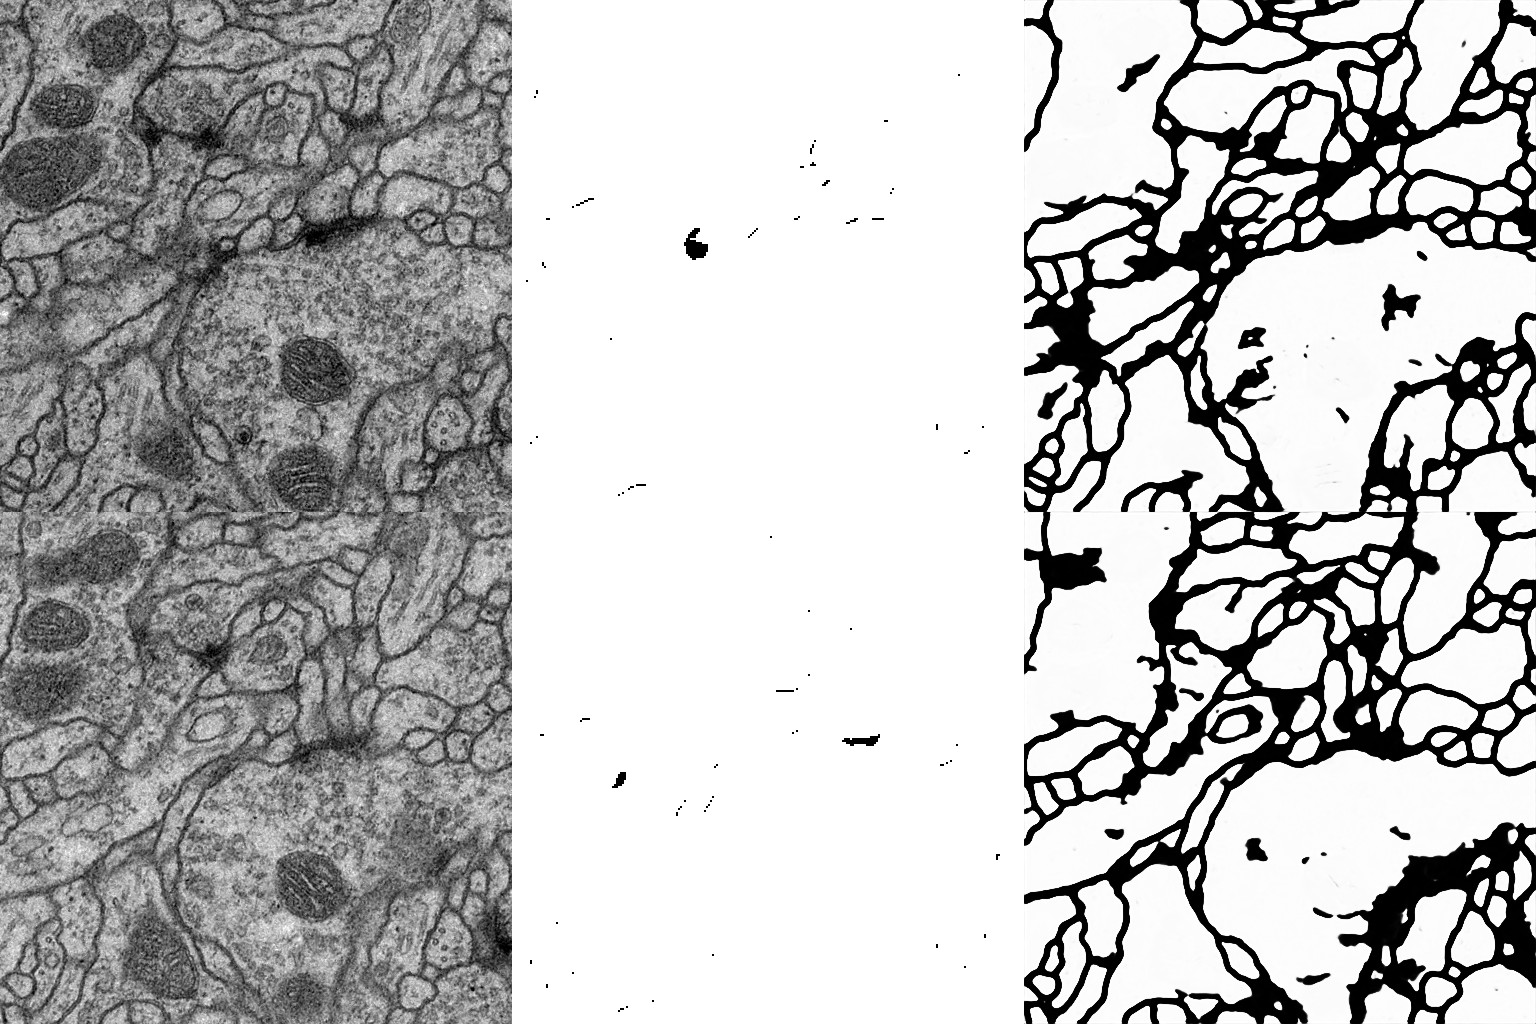

In [5]:
test = Image.open('/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2/epoch_30.jpg')
test